In [1]:
%matplotlib tk

In [1]:
import matplotlib 
matplotlib.use('TKAgg')

In [1]:
%matplotlib qt

In [ ]:
import matplotlib 
matplotlib.use('QT5Agg')

In [ ]:
%matplotlib gtk3

In [4]:
%%markdown
$$f_{X, Y, Z}(x, y, z) = f_{X, Y}(x, y) \, f_{Z|XY}(x, y, z)
= f_{X, Y}(x, y) \, f_{Z|XY}(x, y, z)$$

$$f_{X, Y, Z}(x, y, z) = f_{X, Y}(x, y) \, f_{Z|XY}(x, y, z)
= f_{X, Y}(x, y) \, f_{Z|XY}(x, y, z)$$


In [ ]:
import matplotlib 
matplotlib.use('GTK3Agg')

In [1]:
import matplotlib
matplotlib.use('qt5cairo')
# matplotlib.use('tkcairo')
# matplotlib.use('gtk3agg')

In [1]:
import matplotlib
matplotlib.use("module://mplcairo.qt")

In [2]:
%matplotlib widget

In [3]:
def init_mpl():
    import matplotlib as mpl
    from jupyterthemes import jtplot

    # jtplot.style(theme='monokai', ticks=True, grid=True)
    jtplot.style(theme='monokai', context='notebook', ticks=True, grid=True)

    colors = mpl.rcParams['axes.prop_cycle'].by_key()['color']
    i = 6
    colors[i] = hex(int(colors[i].replace('#', '0x'), 16) ^ 0xFFFFFF).replace('0x', '#')
    mpl.rcParams['axes.prop_cycle'] = mpl.cycler(color=colors)

    mpl.rcParams['path.simplify'] = True
    mpl.rcParams['path.simplify_threshold'] = 1
    mpl.rcParams['agg.path.chunksize'] = 100000


init_mpl()

In [2]:
%matplotlib qt
import matplotlib.pyplot as plt
import numpy as np

# init_mpl()

x = np.linspace(0, 2 * np.pi)
plt.plot(x, np.sin(x))
plt.show()

In [1]:
import matplotlib
matplotlib.use("module://mplcairo.qt")
import matplotlib.pyplot as plt
import numpy as np

# init_mpl()

x = np.linspace(0, 2 * np.pi)
plt.plot(x, np.sin(x))
plt.show()

In [1]:
%matplotlib tk
import matplotlib.pyplot as plt
import numpy as np

# init_mpl()

x = np.linspace(0, 2 * np.pi)
plt.plot(x, np.sin(x))
plt.show()

In [4]:
# %matplotlib widget
import matplotlib.pyplot as plt
import numpy as np

# init_mpl()

x = np.linspace(0, 2 * np.pi)
plt.plot(x, np.sin(x))
plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [1]:
%matplotlib tk
import matplotlib
matplotlib.use("module://mplcairo.tk")

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# init_mpl()

x = np.linspace(0, 2 * np.pi)
plt.plot(x, np.sin(x))
plt.show()

In [4]:
import matplotlib.pyplot as plt
import numpy as np

In [7]:
x = np.linspace(0, 2 * np.pi)
plt.plot(x, np.sin(x))
plt.show()

In [ ]:
plt.ion()

x = np.linspace(0, 2 * np.pi)
plt.plot(x, np.sin(x));

In [2]:
plt.ioff()

x = np.linspace(0, 2 * np.pi)
plt.plot(x, np.sin(x))

plt.show()

In [ ]:
# Setup, and create the data to plot
y = np.random.rand(100000)
y[50000:] *= 2
y[np.logspace(1, np.log10(50000), 400).astype(int)] = -1

plt.figure()
plt.plot(y)
plt.show()

In [3]:
%matplotlib qt
import time
from matplotlib import pyplot as plt
import numpy as np


def live_update_demo(blit = False):
    x = np.linspace(0,50., num=100)
    X,Y = np.meshgrid(x,x)
    fig = plt.figure()
    ax1 = fig.add_subplot(2, 1, 1)
    ax2 = fig.add_subplot(2, 1, 2)

    img = ax1.imshow(X, vmin=-1, vmax=1, interpolation="None", cmap="RdBu")
    # img = ax1.pcolormesh(x, x, X, vmin=-1, vmax=1, cmap="RdBu")
    # img.set_visible(False)


    line, = ax2.plot([], lw=3)
    text = ax2.text(0.8,0.5, "")

    ax2.set_xlim(x.min(), x.max())
    ax2.set_ylim([-1.1, 1.1])

    fig.canvas.draw()   # note that the first draw comes before setting data 


    if blit:
        # cache the background
        axbackground = fig.canvas.copy_from_bbox(ax1.bbox)
        ax2background = fig.canvas.copy_from_bbox(ax2.bbox)

    # img.set_visible(True)
    plt.show(block=False)

    # return


    t_start = time.time()
    k=0.

    for i in np.arange(1000):
        data = np.sin(X/3.+k)*np.cos(Y/3.+k)
        # img.set_array(data.ravel())
        img.set_data(data)
        line.set_data(x, np.sin(x/3.+k))
        tx = 'Mean Frame Rate:\n {fps:.3f}FPS'.format(fps= ((i+1) / (time.time() - t_start)) ) 
        text.set_text(tx)
        #print tx
        k+=0.11
        if blit:
            # restore background
            fig.canvas.restore_region(axbackground)
            fig.canvas.restore_region(ax2background)

            # redraw just the points
            ax1.draw_artist(img)
            ax2.draw_artist(line)
            ax2.draw_artist(text)

            # fill in the axes rectangle
            fig.canvas.blit(ax1.bbox)
            fig.canvas.blit(ax2.bbox)

            # in this post http://bastibe.de/2013-05-30-speeding-up-matplotlib.html
            # it is mentionned that blit causes strong memory leakage. 
            # however, I did not observe that.

        else:
            # redraw everything
            fig.canvas.draw()

        fig.canvas.flush_events()
        #alternatively you could use
        #plt.pause(0.000000000001) 
        # however plt.pause calls canvas.draw(), as can be read here:
        #http://bastibe.de/2013-05-30-speeding-up-matplotlib.html


live_update_demo(True)   # 175 fps
# live_update_demo(False) # 28 fps

In [ ]:
import sys
from PyQt5.QtWidgets import QDialog, QApplication, QPushButton, QVBoxLayout
from PyQt5 import QtCore
import matplotlib
matplotlib.use('Qt5Agg')

from matplotlib.figure import Figure
from matplotlib.backends.backend_qt5agg import FigureCanvasQTAgg as FigureCanvas
from matplotlib.backends.backend_qt5agg import NavigationToolbar2QT as NavigationToolbar
# import matplotlib.pyplot as plt

import random

class Window(QDialog):
    def __init__(self, parent=None):
        super(Window, self).__init__(parent)

        # a figure instance to plot on
        self.figure = Figure()
        self.axes = self.figure.add_subplot(111)

        # this is the Canvas Widget that displays the `figure`
        # it takes the `figure` instance as a parameter to __init__
        self.canvas = FigureCanvas(self.figure)

        # this is the Navigation widget
        # it takes the Canvas widget and a parent
        self.toolbar = NavigationToolbar(self.canvas, self)

        # set the layout
        layout = QVBoxLayout()
        layout.addWidget(self.toolbar)
        layout.addWidget(self.canvas)
        self.setLayout(layout)

        n_data = 50
        self.xdata = list(range(n_data))
        self.ydata = [random.randint(0, 10) for i in range(n_data)]

        # We need to store a reference to the plotted line 
        # somewhere, so we can apply the new data to it.
        plot_refs = self.axes.plot(self.xdata, self.ydata, 'r')
        self._plot_ref = plot_refs[0]
        self.update_plot()

        self.show()

        # Setup a timer to trigger the redraw by calling update_plot.
        self.timer = QtCore.QTimer()
        self.timer.setInterval(1)
        self.timer.timeout.connect(self.update_plot)
        self.timer.start()


    def update_plot(self):
        # Drop off the first y element, append a new one.
        self.ydata = self.ydata[1:] + [random.randint(0, 10)]

        # We have a reference, we can use it to update the data for that line.
        self._plot_ref.set_ydata(self.ydata)

        # Trigger the canvas to update and redraw.
        self.canvas.draw()


if __name__ == '__main__':
    app = QApplication(sys.argv)

    main = Window()
    main.show()

    sys.exit(app.exec_())

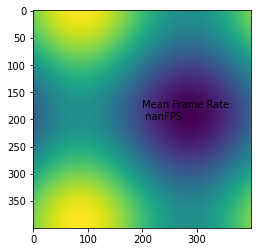

In [1]:
import time
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

fig, ax = plt.subplots()


def f(x, y):
    return np.sin(x) + np.cos(y)

x = np.linspace(0, 2 * np.pi, 400)
y = np.linspace(0, 2 * np.pi, 400).reshape(-1, 1)

im = ax.imshow(f(x, y), animated=True)
text = ax.text(200,200, "")

class FPS():
    def __init__(self, avg=10):
        self.fps = np.empty(avg)
        self.t0 = time.time()
    def tick(self):
        t = time.time()
        self.fps[1:] = self.fps[:-1]
        self.fps[0] = 1./(t-self.t0)
        self.t0 = t
        return self.fps.mean()

fps = FPS(100)

def updatefig(i):
    global x, y
    x += np.pi / 15.
    y += np.pi / 20.
    im.set_array(f(x, y))
    tx = 'Mean Frame Rate:\n {fps:.3f}FPS'.format(fps= fps.tick() ) 
    text.set_text(tx)     
    return im, text,

ani = animation.FuncAnimation(fig, updatefig, interval=1, blit=True)
plt.show()

In [2]:
import sys
import time
from pyqtgraph.Qt import QtCore, QtGui
import numpy as np
import pyqtgraph as pg

class FPS():
    def __init__(self, avg=10):
        self.fps = np.empty(avg)
        self.t0 = time.time()
    def tick(self):
        t = time.time()
        self.fps[1:] = self.fps[:-1]
        self.fps[0] = 1./(t-self.t0)
        self.t0 = t
        return self.fps.mean()

fps = FPS(100)

class App(QtGui.QMainWindow):
    def __init__(self, parent=None):
        super(App, self).__init__(parent)

        #### Create Gui Elements ###########
        self.mainbox = QtGui.QWidget()
        self.setCentralWidget(self.mainbox)
        self.mainbox.setLayout(QtGui.QVBoxLayout())

        self.canvas = pg.GraphicsLayoutWidget()
        self.mainbox.layout().addWidget(self.canvas)

        self.label = QtGui.QLabel()
        self.mainbox.layout().addWidget(self.label)

        self.view = self.canvas.addViewBox()
        self.view.setAspectLocked(True)
        self.view.setRange(QtCore.QRectF(0,0, 100, 100))

        #  image plot
        self.img = pg.ImageItem(border='w')
        self.view.addItem(self.img)

        #### Set Data  #####################
        self.x = np.linspace(0, 2 * np.pi, 400)
        self.y = np.linspace(0, 2 * np.pi, 400).reshape(-1, 1)

        #### Start  #####################
        self._update()
        
    def f(self, x, y):
            return np.sin(x) + np.cos(y)
        
    def _update(self):

        self.x += np.pi / 15.
        self.y += np.pi / 20.
        self.img.setImage(self.f(self.x, self.y))

        tx = 'Mean Frame Rate:\n {fps:.3f}FPS'.format(fps= fps.tick() ) 
        self.label.setText(tx)
        QtCore.QTimer.singleShot(1, self._update)


if __name__ == '__main__':

    app = QtGui.QApplication(sys.argv)
    thisapp = App()
    thisapp.show()
    sys.exit(app.exec_())

SystemExit: 0

/home/alz/miniconda3/envs/env1/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3449: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [1]:
import sys
import time
from pyqtgraph.Qt import QtCore, QtGui
import numpy as np
import pyqtgraph as pg


class App(QtGui.QMainWindow):
    def __init__(self, parent=None):
        super(App, self).__init__(parent)

        #### Create Gui Elements ###########
        self.mainbox = QtGui.QWidget()
        self.setCentralWidget(self.mainbox)
        self.mainbox.setLayout(QtGui.QVBoxLayout())

        self.canvas = pg.GraphicsLayoutWidget()
        self.mainbox.layout().addWidget(self.canvas)

        self.label = QtGui.QLabel()
        self.mainbox.layout().addWidget(self.label)

        self.view = self.canvas.addViewBox()
        self.view.setAspectLocked(True)
        self.view.setRange(QtCore.QRectF(0,0, 100, 100))

        #  image plot
        self.img = pg.ImageItem(border='w')
        self.view.addItem(self.img)

        self.canvas.nextRow()
        #  line plot
        self.otherplot = self.canvas.addPlot()
        self.h2 = self.otherplot.plot(pen='y')


        #### Set Data  #####################

        self.x = np.linspace(0,50., num=100)
        self.X,self.Y = np.meshgrid(self.x,self.x)

        self.counter = 0
        self.fps = 0.
        self.lastupdate = time.time()

        #### Start  #####################
        self._update()

    def _update(self):

        self.data = np.sin(self.X/3.+self.counter/9.)*np.cos(self.Y/3.+self.counter/9.)
        self.ydata = np.sin(self.x/3.+ self.counter/9.)

        self.img.setImage(self.data)
        self.h2.setData(self.ydata)

        now = time.time()
        dt = (now-self.lastupdate)
        if dt <= 0:
            dt = 0.000000000001
        fps2 = 1.0 / dt
        self.lastupdate = now
        self.fps = self.fps * 0.9 + fps2 * 0.1
        tx = 'Mean Frame Rate:  {fps:.3f} FPS'.format(fps=self.fps )
        self.label.setText(tx)
        QtCore.QTimer.singleShot(1, self._update)
        self.counter += 1


if __name__ == '__main__':

    app = QtGui.QApplication(sys.argv)
    thisapp = App()
    thisapp.show()
    sys.exit(app.exec_())

SystemExit: 0

/home/alz/miniconda3/envs/env1/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3449: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


/tmp/ipykernel_3669907/2263209420.py:30: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  pts = ax.plot([], [], [], 'bo', c='blue')


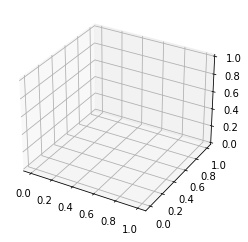

In [1]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.animation as animation
import matplotlib.pyplot as plt
import numpy as np


class Ball:

    def __init__(self, initpos, initvel, radius, M):
        self.pos = initpos
        self.vel = initvel
        self.radius = radius
        self.M = M

    def step(self, dt):

        self.pos += self.vel * dt
        self.vel[2] += -9.81 * dt * self.M

initpos = np.array([5., 5., 10.])
initvel = np.array([0., 0., 0.])
radius = .25
M, dt = 1, .1


test_ball = Ball(initpos, initvel, radius, M)

fig, ax = plt.subplots(subplot_kw=dict(projection='3d'))

pts = ax.plot([], [], [], 'bo', c='blue')


def init():
    null = np.array([])
    for pt in pts:
        pt.set_data(null, null)
        pt.set_3d_properties(null)
    ax.set_xlim3d(0, 1.5 * initpos[0])
    ax.set_ylim3d(0, 1.5 * initpos[1])
    ax.set_zlim3d(0, 1.5 * initpos[2])
    return pts


def animate(i):
    test_ball.step(dt)
    for pt in pts:
        pt.set_data(test_ball.pos[0], test_ball.pos[1])
        pt.set_3d_properties(test_ball.pos[2])
        pt.set_markersize(10)

    return pts

anim = animation.FuncAnimation(fig, animate, init_func=init, frames=50)
plt.show()
# mywriter = animation.FFMpegWriter(fps=10)
# anim.save('mymovie.mp4', writer=mywriter)

In [16]:
%debug

> /home/alz/miniconda3/envs/sci3/lib/python3.8/site-packages/mpl_toolkits/mplot3d/art3d.py(143)set_3d_properties()
    141         xs = self.get_xdata()
    142         ys = self.get_ydata()
--> 143         zs = np.broadcast_to(zs, xs.shape)
    144         self._verts3d = juggle_axes(xs, ys, zs, zdir)
    145         self.stale = True

array([], dtype=float64)
[]
[]
*** AttributeError: 'list' object has no attribute 'shape'
[]
[]
